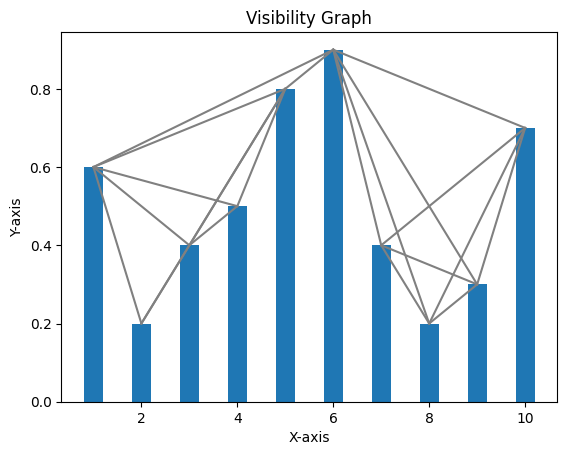

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def check(i, j, data):
    k = (data[j] - data[i]) / (j - i)
    for cur in range(i + 1, j, 1):
        hi = data[i] + k * (cur - i)
        if hi < data[cur]:
            return False

    return True


# 数据
data = [0.6, 0.2, 0.4, 0.5, 0.8, 0.9, 0.4, 0.2, 0.3, 0.7]

# 绘制条形图
plt.bar(range(1, 11), data, width=0.4)

# 创建Visibility Graph的边
edges = []
# for i in range(len(data)):
#     for j in range(i+1, len(data)):
#         if check(i,j,data):
#             edges.append((i+1, j+1))

for i in range(len(data) - 1):
    for j in range(i + 1, len(data)):
        if check(i, j, data):
            edges.append((i + 1, j + 1))


# 绘制Visibility Graph
for edge in edges:
    x1, x2 = edge
    plt.plot([x1, x2], [data[x1 - 1], data[x2 - 1]], color="gray", linestyle="-")

# 设置美观的坐标轴和标题
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Visibility Graph")

# 显示图表
plt.show()

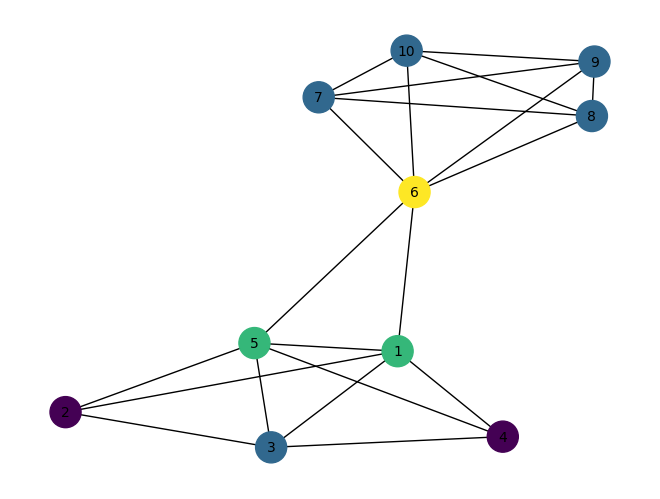

In [4]:
import matplotlib.pyplot as plt
import networkx as nx


def check(i, j, data):
    k = (data[j] - data[i]) / (j - i)
    for cur in range(i + 1, j, 1):
        hi = data[i] + k * (cur - i)
        if hi < data[cur]:
            return False

    return True


# 创建一个简单的图
G = nx.Graph()
# 数据
data = [0.6, 0.2, 0.4, 0.5, 0.8, 0.9, 0.4, 0.2, 0.3, 0.7]
# 添加节点
nodes = range(1, len(data))
G.add_nodes_from(nodes)

edges = []
# for i in range(len(data)):
#     for j in range(i+1, len(data)):
#         if check(i,j,data):
#             edges.append((i+1, j+1))

for i in range(len(data) - 1):
    for j in range(i + 1, len(data)):
        if check(i, j, data):
            edges.append((i + 1, j + 1))
G.add_edges_from(edges)

node_degrees = dict(G.degree())

# 根据节点度数设置颜色
node_colors = [node_degrees[node] for node in G.nodes]

# 绘制可见性图
pos = nx.spring_layout(G)  # 定义节点位置布局
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10, font_color='black')
edge_labels = {}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 设置图的标题
# plt.title("Visibility Graph")

# 显示图
plt.axis('off')
plt.show()
